<a href="https://colab.research.google.com/github/alirezashadmani/Deep-Learning-Course/blob/master/flower_photos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import models, layers
from keras.preprocessing.image import ImageDataGenerator
import os
from google.colab import files
import zipfile
import random
from shutil import copyfile
from keras import optimizers
import tensorflow as tf

In [ ]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)


228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
!ls /root/.keras/datasets/flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [ ]:
!mkdir /tmp/Dataset

In [ ]:
os.mkdir('/tmp/Dataset/train/')
os.mkdir('/tmp/Dataset/test/')

In [ ]:
os.mkdir('/tmp/Dataset/train/daisy/')
os.mkdir('/tmp/Dataset/test/daisy/')
os.mkdir('/tmp/Dataset/train/dandelion/')
os.mkdir('/tmp/Dataset/test/dandelion')
os.mkdir('/tmp/Dataset/train/roses/')
os.mkdir('/tmp/Dataset/test/roses/')
os.mkdir('/tmp/Dataset/train/sunflowers/')
os.mkdir('/tmp/Dataset/test/sunflowers/')
os.mkdir('/tmp/Dataset/train/tulips/')
os.mkdir('/tmp/Dataset/test/tulips/')

In [ ]:
def split_data(SOURCE, TRAIN,TEST,SPLIT_SIZE):
  data=os.listdir(SOURCE)
  data_random=random.sample(data,len(data))
  train_size=int(len(data_random)*SPLIT_SIZE)
  for each_pic in data_random[:train_size]:
    if os.path.getsize(SOURCE+each_pic) !=0:
      copyfile(SOURCE+each_pic,TRAIN+each_pic)
  for each_pic in data_random[train_size:]:
    if os.path.getsize(SOURCE+each_pic) !=0:
      copyfile(SOURCE+each_pic,TEST+each_pic)


daisy='/root/.keras/datasets/flower_photos/daisy/'
dandelion='/root/.keras/datasets/flower_photos/dandelion/'
roses='/root/.keras/datasets/flower_photos/roses/'
sunflowers='/root/.keras/datasets/flower_photos/sunflowers/'
tulips='/root/.keras/datasets/flower_photos/tulips/'





sunflowers_train='/tmp/Dataset/train/sunflowers/'
sunflowers_test='/tmp/Dataset/test/sunflowers/'
daisy_train='/tmp/Dataset/train/daisy/'
daisy_test='/tmp/Dataset/test/daisy/'
dandelion_train='/tmp/Dataset/train/dandelion/'
dandelion_test='/tmp/Dataset/test/dandelion'
roses_train='/tmp/Dataset/train/roses/'
roses_test='/tmp/Dataset/test/roses/'
tulips_train='/tmp/Dataset/train/tulips/'
tulips_test='/tmp/Dataset/test/tulips/'

split_data(daisy,daisy_train,daisy_test,0.85)
split_data(dandelion,dandelion_train,dandelion_test,0.85)
split_data(roses,roses_train,roses_test,0.85)
split_data(sunflowers,sunflowers_train,sunflowers_test,0.85)
split_data(tulips,tulips_train,tulips_test,0.85)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen=train_datagen.flow_from_directory('/tmp/Dataset/train/',batch_size=50,target_size=(150,150),class_mode='categorical')
test_gen=test_datagen.flow_from_directory('/tmp/Dataset/test/',batch_size=50,target_size=(150,150),class_mode='categorical')

Found 3118 images belonging to 5 classes.
Found 417 images belonging to 5 classes.


In [ ]:
Network=models.Sequential([
                            layers.Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu',padding='same' ),
                            layers.Conv2D(32, (3,3),  activation='relu',padding='same' ),
                            layers.MaxPool2D((2,2)),
                            
                            layers.Flatten(),
                            layers.Dense(20,activation='relu'),
                            layers.Dropout(0.5),
                            layers.Dense(5,activation='softmax')
                            ])

In [ ]:
print(Network.summary())
Network.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 180000)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                3600020   
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                

In [ ]:
 history=Network.fit_generator(generator=train_gen,
                      steps_per_epoch=3118//50,
                      epochs=40,
                      validation_data=test_gen,
                      validation_steps=417//50)

Epoch 1/40
62/62 [==============================] - 186s 3s/step - loss: 1.8905 - accuracy: 0.2731 - val_loss: 1.3255 - val_accuracy: 0.4725
Epoch 2/40
62/62 [==============================] - 181s 3s/step - loss: 1.4129 - accuracy: 0.3801 - val_loss: 1.2821 - val_accuracy: 0.4775
Epoch 3/40
62/62 [==============================] - 182s 3s/step - loss: 1.3594 - accuracy: 0.4117 - val_loss: 1.1835 - val_accuracy: 0.4975
Epoch 4/40
62/62 [==============================] - 186s 3s/step - loss: 1.3164 - accuracy: 0.4146 - val_loss: 1.2480 - val_accuracy: 0.4950
Epoch 5/40
62/62 [==============================] - 181s 3s/step - loss: 1.2944 - accuracy: 0.4260 - val_loss: 1.1984 - val_accuracy: 0.4975
Epoch 6/40
62/62 [==============================] - 182s 3s/step - loss: 1.2686 - accuracy: 0.4374 - val_loss: 1.1616 - val_accuracy: 0.5425
Epoch 7/40
62/62 [==============================] - 185s 3s/step - loss: 1.2293 - accuracy: 0.4641 - val_loss: 1.1473 - val_accuracy: 0.5525
Epoch 8/40
62

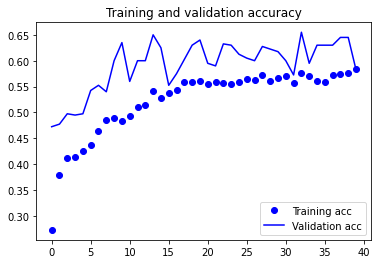

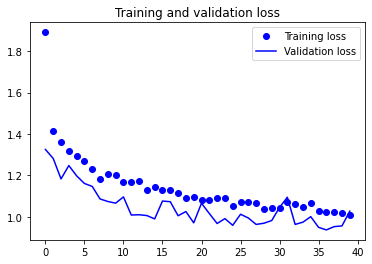

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()